In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df_full = pd.read_csv("./resources/datasets/cars_2010_2020.csv")

df_full.head()

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65


In [2]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             10000 non-null  object 
 1   Model            10000 non-null  object 
 2   Year             10000 non-null  int64  
 3   Engine Size (L)  10000 non-null  float64
 4   Fuel Type        10000 non-null  object 
 5   Price (USD)      10000 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 468.9+ KB


In [3]:
num_cols = [col for col in df_full.columns if df_full[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in df_full.columns if df_full[col].dtype == 'object']

oe = OrdinalEncoder()
df_oe = df_full.copy()
df_oe[cat_cols] = oe.fit_transform(df_oe[cat_cols])
df_combined = df_oe[num_cols + cat_cols]

Matriks Korelasi:
                     Year  Engine Size (L)  Price (USD)      Make     Model  \
Year             1.000000        -0.007676    -0.004651 -0.000230  0.010837   
Engine Size (L) -0.007676         1.000000     0.002370 -0.005727 -0.018980   
Price (USD)     -0.004651         0.002370     1.000000  0.007241 -0.025594   
Make            -0.000230        -0.005727     0.007241  1.000000  0.179059   
Model            0.010837        -0.018980    -0.025594  0.179059  1.000000   
Fuel Type       -0.006079        -0.002237    -0.010987 -0.001840  0.004416   

                 Fuel Type  
Year             -0.006079  
Engine Size (L)  -0.002237  
Price (USD)      -0.010987  
Make             -0.001840  
Model             0.004416  
Fuel Type         1.000000  


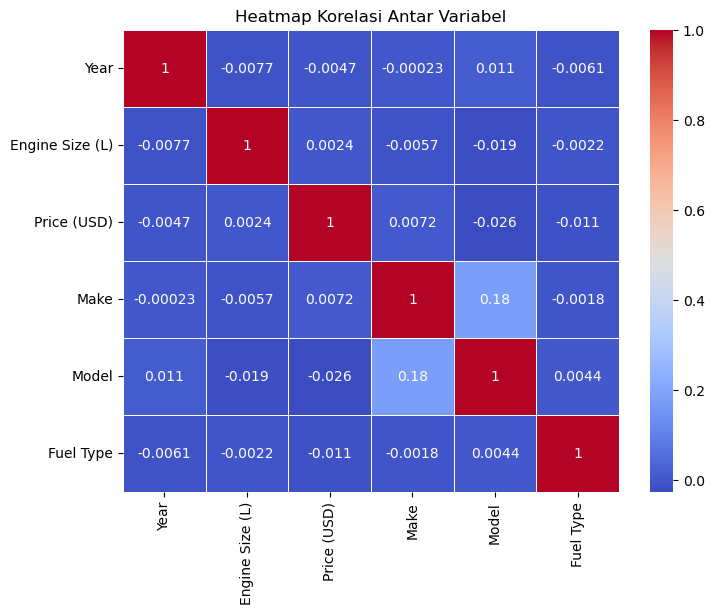

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = df_combined.corr()

print("Matriks Korelasi:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()